<a href="https://colab.research.google.com/github/ismail-memon-123/CS_5262_ML/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks

In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Task 1: Linear Regression with One Variable

In [28]:
#Load data from txt file
food_data = np.array([
[6.1101,17.592],
[5.5277,9.1302],
[8.5186,13.662],
[7.0032,11.854],
[5.8598,6.8233],
[8.3829,11.886],
[7.4764,4.3483],
[8.5781,12],
[6.4862,6.5987],
[5.0546,3.8166],
[5.7107,3.2522],
[14.164,15.505],
[5.734,3.1551],
[8.4084,7.2258],
[5.6407,0.71618],
[5.3794,3.5129],
[6.3654,5.3048],
[5.1301,0.56077],
[6.4296,3.6518],
[7.0708,5.3893],
[6.1891,3.1386],
[20.27,21.767],
[5.4901,4.263],
[6.3261,5.1875],
[5.5649,3.0825],
[18.945,22.638],
[12.828,13.501],
[10.957,7.0467],
[13.176,14.692],
[22.203,24.147],
[5.2524,-1.22],
[6.5894,5.9966],
[9.2482,12.134],
[5.8918,1.8495],
[8.2111,6.5426],
[7.9334,4.5623],
[8.0959,4.1164],
[5.6063,3.3928],
[12.836,10.117],
[6.3534,5.4974],
[5.4069,0.55657],
[6.8825,3.9115],
[11.708,5.3854],
[5.7737,2.4406],
[7.8247,6.7318],
[7.0931,1.0463],
[5.0702,5.1337],
[5.8014,1.844],
[11.7,8.0043],
[5.5416,1.0179],
[7.5402,6.7504],
[5.3077,1.8396],
[7.4239,4.2885],
[7.6031,4.9981],
[6.3328,1.4233],
[6.3589,-1.4211],
[6.2742,2.4756],
[5.6397,4.6042],
[9.3102,3.9624],
[9.4536,5.4141],
[8.8254,5.1694],
[5.1793,-0.74279],
[21.279,17.929],
[14.908,12.054],
[18.959,17.054],
[7.2182,4.8852],
[8.2951,5.7442],
[10.236,7.7754],
[5.4994,1.0173],
[20.341,20.992],
[10.136,6.6799],
[7.3345,4.0259],
[6.0062,1.2784],
[7.2259,3.3411],
[5.0269,-2.6807],
[6.5479,0.29678],
[7.5386,3.8845],
[5.0365,5.7014],
[10.274,6.7526],
[5.1077,2.0576],
[5.7292,0.47953],
[5.1884,0.20421],
[6.3557,0.67861],
[9.7687,7.5435],
[6.5159,5.3436],
[8.5172,4.2415],
[9.1802,6.7981],
[6.002,0.92695],
[5.5204,0.152],
[5.0594,2.8214],
[5.7077,1.8451],
[7.6366,4.2959],
[5.8707,7.2029],
[5.3054,1.9869],
[8.2934,0.14454],
[13.394,9.0551],
[5.4369,0.61705],
])

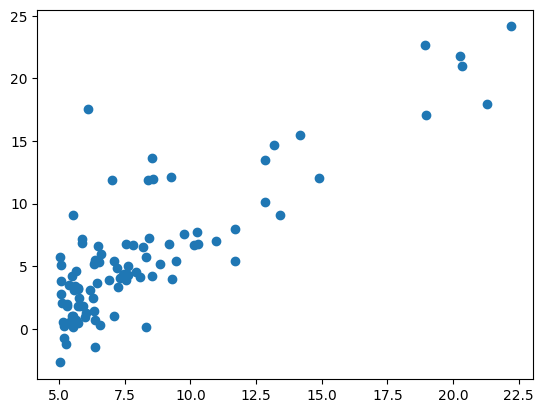

In [29]:
# Plot the data food_data
plt.scatter(food_data[:,0], food_data[:,1])
plt.show()

In [30]:
# make up some initial thetas
theta_0 = 0.22
theta_1 = 0.86

In [59]:
def calculate_single_forward(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)

        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    y = train_ex[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1
    error = y_hat - y
    if error < 0:
        error = -error

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

In [60]:
def gradient_descent(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005

    returns:
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iteration
    '''

    total_error = 0
    overall_gradients = np.zeros(2)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = calculate_single_forward(thetas, ex)
        # gradients[0] is the error term (gradients[0] = error * x0 = error * 1)
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]

    return thetas, total_error

In [61]:
# set initial parameters
thetas = [1.01, 3.01]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 100
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(food_data, thetas, alpha)
    print(thetas)
    # store a history of errors
    error_traj[epoch] = epoch_error


[np.float64(-8.559953529999998), np.float64(-88.14013183219194)]
[np.float64(-364.3583476383451), np.float64(-3633.5534779520463)]
[np.float64(-14923.702916398597), np.float64(-148563.19331058688)]
[np.float64(-610103.8140275794), np.float64(-6073065.87831867)]
[np.float64(-24940183.428455226), np.float64(-248257766.38107145)]
[np.float64(-1019517030.4496256), np.float64(-10148401743.31873)]
[np.float64(-41676313137.43878), np.float64(-414851302377.0475)]
[np.float64(-1703664598723.001), np.float64(-16958493310383.232)]
[np.float64(-69643230080428.07), np.float64(-693237537667431.1)]
[np.float64(-2846909831700911.5), np.float64(-2.8338501235657916e+16)]
[np.float64(-1.163773647556958e+17), np.float64(-1.1584350365468006e+18)]
[np.float64(-4.757330519101279e+18), np.float64(-4.735507085359208e+19)]
[np.float64(-1.944724707891686e+20), np.float64(-1.9358036185036672e+21)]
[np.float64(-7.949740246761033e+21), np.float64(-7.913272183664451e+22)]
[np.float64(-3.249733483331263e+23), np.floa

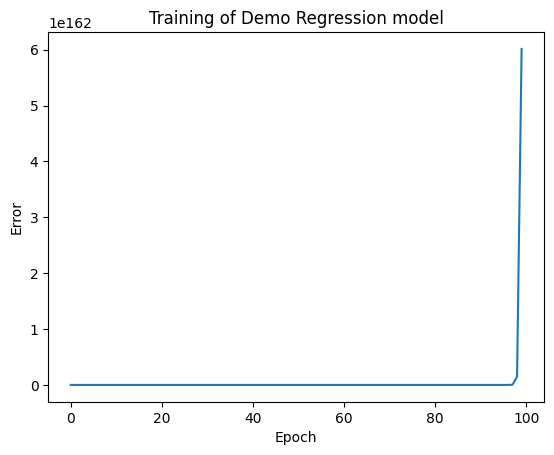

In [62]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

2.1485524242032163e+158
2.1386963103001127e+159


Text(0.5, 1.0, 'Comparison of pre- vs post-model training')

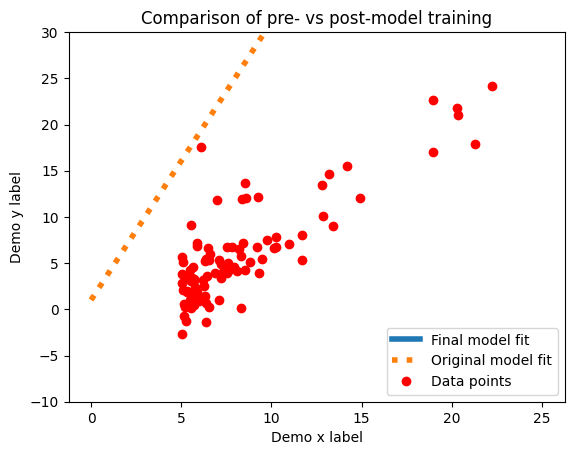

In [53]:
lin_pts = np.linspace(0, 25, 100) # gives you 100 values between [0, 25]

mdl_pts = thetas[0] + lin_pts * thetas[1]
print(thetas[0])
print(thetas[1])
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model fit')
plt.legend()
ax = plt.gca()
ax.set_ylim([-10, 30])

# Let's look at the original least squares
orig_mdl_pts = old_thetas[0] + lin_pts * old_thetas[1]
plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='Original model fit')
plt.legend()

# Let's plot the original points
plt.plot(food_data[:,0], food_data[:,1], 'ro', label='Data points') # 'ro' for red, circle
plt.legend()
plt.xlabel('Demo x label')
plt.ylabel('Demo y label')
plt.title('Comparison of pre- vs post-model training')
